#  IPL - Exploratory Data Analysis (2008-2022) 

# What is EDA?
![](https://imgur.com/MD6ozKC.jpg)
Exploratory Data Analysis is a data analytics process to understand the data in depth and learn the different data characteristics, often with visual means. This allows you to get a better feel of your data and find useful patterns in it.
Exploratory Data Analysis (EDA) is an approach/philosophy for data analysis that employs a variety of techniques (mostly graphical) to
* maximize insight into a data set;
* uncover underlying structure;
* extract important variables;
* detect outliers and anomalies;
* test underlying assumptions;
* develop parsimonious models; and
* determine optimal factor settings.

# IPL (Indian Premier League)
![](https://imgur.com/p0njyn7.png)

* The Indian Premier League (IPL) is a men's T20 franchise cricket league of India. It is annually contested by ten teams based out of seven Indian cities and three Indian states. The league was founded by the Board of Control for Cricket in India (BCCI) in 2007. Brijesh Patel is the incumbent chairman of IPL. It is usually held annually in summer across India between March to May and has an exclusive window in the ICC Future Tours Programme.


* The IPL is the most-attended cricket league in the world. In 2014, it was ranked sixth by average attendance among all sports leagues. In 2010, the IPL became the first sporting event in the world to be broadcast live on YouTube. The brand value of the IPL in 2022 was ₹90,038 crore (US$11 billion). According to BCCI, the 2015 IPL season contributed ₹1,150 crore (US$140 million) to the GDP of the Indian economy.


* So far there have been fifteen seasons of the IPL tournament. The current IPL title holder franchise is Gujarat Titans, winning the 2022 season and their first season.

## About the Dataset
The dataset consists of data about IPL matches played from the year 2008 to 2022. IPL is a professional Twenty20 cricket league founded by the Board of Control for Cricket in India (BCCI) in 2008. The league has 8 teams representing 8 different Indian cities or states. It enjoys tremendous popularity and the brand value of the IPL in 2022 was estimated to be ₹1150 billion (US$11 billion).

Content:

Data till Season 14 (2008 - 2022)

matches.csv - Match by match data

deliveries.csv - Ball by ball data

# Importing Libraries

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import colorama
from colorama import Fore, Back, Style
import random
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import warnings
warnings.filterwarnings('ignore')

def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

# Download The Data

In [2]:
pip install opendatasets --upgrade --quiet

^C
Note: you may need to restart the kernel to use updated packages.


In [3]:
import opendatasets as od
download_url='https://www.kaggle.com/datasets/vora1011/ipl-2022-match-dataset?select=IPL_Ball_by_Ball_2022.csv'
od.download(download_url)

Skipping, found downloaded files in ".\ipl-2022-match-dataset" (use force=True to force download)


# Data Preperation and Cleaning
* Loding the file using pandas
* Look at some information about the data & the columns
* Fix any missing and incorrect values

In [4]:
delivery_df = '/ipl-2022-match-dataset/IPL_Ball_by_Ball_2022.csv'
match_df = '/ipl-2022-match-dataset/IPL_Matches_2022.csv'

In [63]:
delivery_df = pd.read_csv("IPL_Ball_by_Ball_2008_2022.csv.zip")
match_df = pd.read_csv("IPL_Matches_2008_2022.csv")

In [64]:
#let us rename the features
match_df.columns = ['id','city','date','season','matchnumber','team1','team2','venue',
                      'tosswinner','tossdecision','superover','winningteam','wonby','margin',
                      'method','player_of_match','team1players','team2players','umpire1','umpire2']

delivery_df.columns  = ['id','inning','over','ballnumber','batter','bowler','non_striker',
                      'extra_type','batsman_run','extras_run','total_runs','non_boundary',
                      'is_wicket', 'player_out','dismissal_kind','fielders_involved','battingteam']

In [65]:
match_df.head()

,id,city,date,season,matchnumber,team1,team2,venue,tosswinner,tossdecision,superover,winningteam,wonby,margin,method,player_of_match,team1players,team2players,umpire1,umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [66]:
delivery_df.head()

,id,inning,over,ballnumber,batter,bowler,non_striker,extra_type,batsman_run,extras_run,total_runs,non_boundary,is_wicket,player_out,dismissal_kind,fielders_involved,battingteam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [67]:
match_df.shape

(950, 20)

In [68]:
delivery_df.shape

(225954, 17)

In [69]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               950 non-null    int64  
 1   city             899 non-null    object 
 2   date             950 non-null    object 
 3   season           950 non-null    object 
 4   matchnumber      950 non-null    object 
 5   team1            950 non-null    object 
 6   team2            950 non-null    object 
 7   venue            950 non-null    object 
 8   tosswinner       950 non-null    object 
 9   tossdecision     950 non-null    object 
 10  superover        946 non-null    object 
 11  winningteam      946 non-null    object 
 12  wonby            950 non-null    object 
 13  margin           932 non-null    float64
 14  method           19 non-null     object 
 15  player_of_match  946 non-null    object 
 16  team1players     950 non-null    object 
 17  team2players    

In [70]:
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 225954 non-null  int64 
 1   inning             225954 non-null  int64 
 2   over               225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   bowler             225954 non-null  object
 6   non_striker        225954 non-null  object
 7   extra_type         12049 non-null   object
 8   batsman_run        225954 non-null  int64 
 9   extras_run         225954 non-null  int64 
 10  total_runs         225954 non-null  int64 
 11  non_boundary       225954 non-null  int64 
 12  is_wicket          225954 non-null  int64 
 13  player_out         11151 non-null   object
 14  dismissal_kind     11151 non-null   object
 15  fielders_involved  7988 non-null    object
 16  battingteam        2

In [71]:
match_df.describe()

,id,margin
count,9.500000e+02,932.000000
mean,8.304852e+05,17.056867
std,3.375678e+05,21.633109
min,3.359820e+05,1.000000
25%,5.012612e+05,6.000000
50%,8.297380e+05,8.000000
75%,1.175372e+06,19.000000
max,1.312200e+06,146.000000


In [72]:
delivery_df.describe()

,id,inning,over,ballnumber,batsman_run,extras_run,total_runs,non_boundary,is_wicket
count,2.259540e+05,225954.000000,225954.000000,225954.000000,225954.000000,225954.000000,225954.00000,225954.000000,225954.000000
mean,8.320470e+05,1.483868,9.185679,3.619750,1.243523,0.066907,1.31043,0.000093,0.049351
std,3.379542e+05,0.503104,5.681797,1.810633,1.618166,0.341470,1.60605,0.009640,0.216600
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,5.012620e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,8.297370e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.00000,0.000000,0.000000
75%,1.178395e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.00000,0.000000,0.000000
max,1.312200e+06,6.000000,19.000000,10.000000,6.000000,7.000000,7.00000,1.000000,1.000000


In [73]:
delivery_df.columns

Index(['id', 'inning', 'over', 'ballnumber', 'batter', 'bowler', 'non_striker',
       'extra_type', 'batsman_run', 'extras_run', 'total_runs', 'non_boundary',
       'is_wicket', 'player_out', 'dismissal_kind', 'fielders_involved',
       'battingteam'],
      dtype='object')

In [74]:
match_df.columns

Index(['id', 'city', 'date', 'season', 'matchnumber', 'team1', 'team2',
       'venue', 'tosswinner', 'tossdecision', 'superover', 'winningteam',
       'wonby', 'margin', 'method', 'player_of_match', 'team1players',
       'team2players', 'umpire1', 'umpire2'],
      dtype='object')

## DataTypes

In [75]:
match_df.dtypes

id                   int64
city                object
date                object
season              object
matchnumber         object
team1               object
team2               object
venue               object
tosswinner          object
tossdecision        object
superover           object
winningteam         object
wonby               object
margin             float64
method              object
player_of_match     object
team1players        object
team2players        object
umpire1             object
umpire2             object
dtype: object

In [76]:
delivery_df.dtypes

id                    int64
inning                int64
over                  int64
ballnumber            int64
batter               object
bowler               object
non_striker          object
extra_type           object
batsman_run           int64
extras_run            int64
total_runs            int64
non_boundary          int64
is_wicket             int64
player_out           object
dismissal_kind       object
fielders_involved    object
battingteam          object
dtype: object

## Checking for Null values

In [77]:
match_df.isnull().sum()

id                   0
city                51
date                 0
season               0
matchnumber          0
team1                0
team2                0
venue                0
tosswinner           0
tossdecision         0
superover            4
winningteam          4
wonby                0
margin              18
method             931
player_of_match      4
team1players         0
team2players         0
umpire1              0
umpire2              0
dtype: int64

In [78]:
delivery_df.isnull().sum()

id                        0
inning                    0
over                      0
ballnumber                0
batter                    0
bowler                    0
non_striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_runs                0
non_boundary              0
is_wicket                 0
player_out           214803
dismissal_kind       214803
fielders_involved    217966
battingteam               0
dtype: int64

In [79]:
#Let us add new derived features to the ball_data Dataframe...
delivery_df['bowlingteam'] = ''
delivery_df['first_batter'] = ''
delivery_df['second_batter'] = ''

In [80]:
#In ball_data, we have two types of rows, which are to be treated as same for computing the partnership
#batter        non-striker
#-------------------------
#YBK Jaiswal   JC Buttler
#JC Buttler    YBK Jaiswal

#So we will be creating two new features as below and use them from partnership calculation
#first_batter second_batter
#--------------------------
#JC Buttler    YBK Jaiswal
#JC Buttler    YBK Jaiswal

delivery_df['first_batter']  = delivery_df.apply(lambda x: x['batter'] if x['batter']  <  x['non_striker'] else x['non_striker'], axis=1)
delivery_df['second_batter'] = delivery_df.apply(lambda x: x['non_striker'] if x['batter']  <  x['non_striker'] else x['batter'], axis=1)

In [81]:
#In ball_data,we have battingteam feature, let us add bowlingteam fature
#Let us add season info too..
delivery_df = pd.merge(delivery_df, match_df[['id','team1','team2','season']], how='left', on='id')
delivery_df['bowlingteam'] = delivery_df.apply(lambda x: x['team2'] if x['battingteam'] == x['team1'] else x['team1'], axis=1)

In [82]:
#In match_data, we have winningteam team feature and let us add win_against feature to it
match_df['win_against'] = match_df.apply(lambda x: x['team2'] if x['winningteam'] == x['team1'] else x['team1'], axis=1)

In [83]:
match_df.venue.replace({'Feroz Shah Kotla Ground':'Feroz Shah Kotla',
                        'Wankhede Stadium':'Wankhede Stadium, Mumbai',
                        'Wankhede Stadium, Mumbai, Mumbai, Mumbai':'Wankhede Stadium, Mumbai',
                        'Eden Gardens':'Eden Gardens, Kolkata',
                        'M.Chinnaswamy Stadium ':'M.Chinnaswamy Stadium Bangalore',
                        'M Chinnaswamy Stadium':'M.Chinnaswamy Stadium Bangalore',
                        'M.Chinnaswamy Stadium':'M.Chinnaswamy Stadium Bangalore',
                        'M. Chinnaswamy Stadium':'M.Chinnaswamy Stadium Bangalore',
                        'MA Chidambaram Stadium, Chepauk':'MA Chidambaram Stadium, Chepauk, Chennai',
                    'MA Chidambaram Stadium, Chepauk':'M.A. Chidambaram Stadium',
                     'M. A. Chidambaram Stadium':'M.A. Chidambaram Stadium',
                     'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'IS Bindra Stadium':'Punjab Cricket Association Stadium',
                    'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium',
                    'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium'},regex=True,inplace=True)

In [84]:
match_df.venue.replace({'M.Chinnaswamy Stadium Bangalore Bangalore':'M.Chinnaswamy Stadium Bangalore'},regex=True,inplace=True)

# Exploratory Analysis and Visualization

## Which Season had most number of Matches?

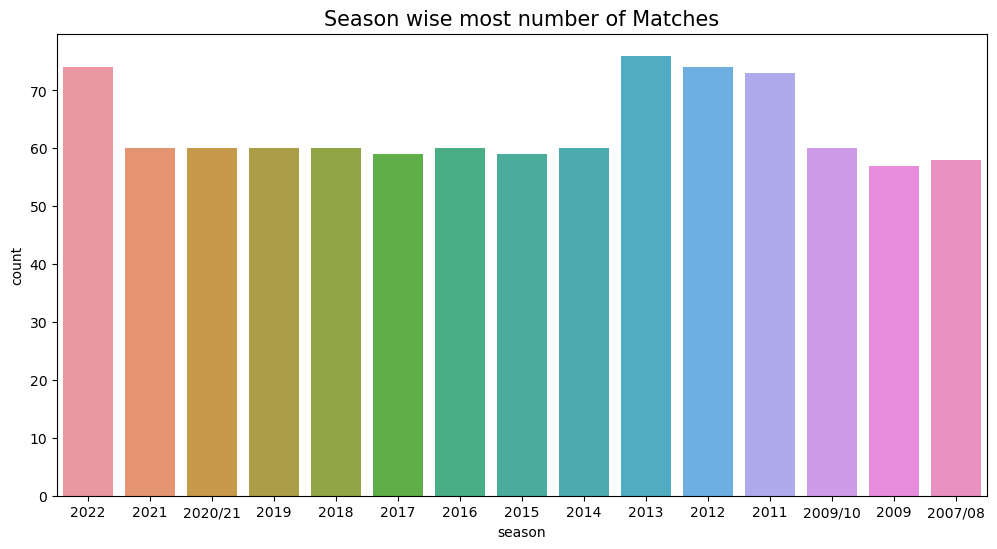

In [144]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', data=match_df)
plt.title("Season wise most number of Matches", fontsize=15, color='black', fontweight='normal') 
plt.show()

> In **2013**, we have the most number of matches

## Which team Won most number of Matches?

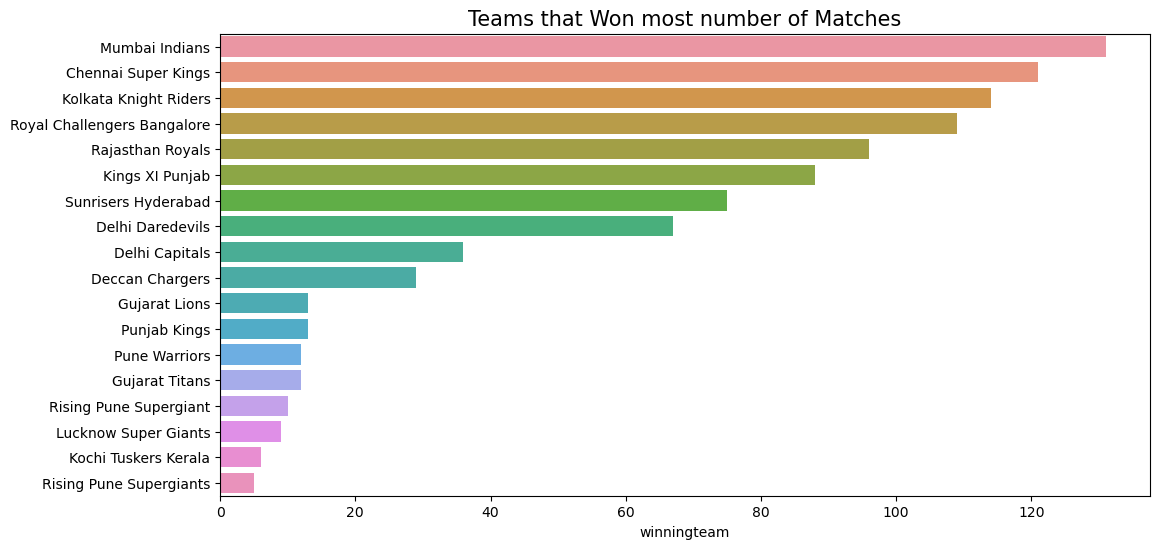

In [143]:
plt.figure(figsize=(12,6))
data = match_df.winningteam.value_counts()
sns.barplot(y = data.index, x = data, orient='h')
plt.title("Teams that Won most number of Matches", fontsize=15, color='black', fontweight='normal') 
plt.show()

> **Mumbai Indians** are the winners in most of the matches

## Which team Played most number of Matches?

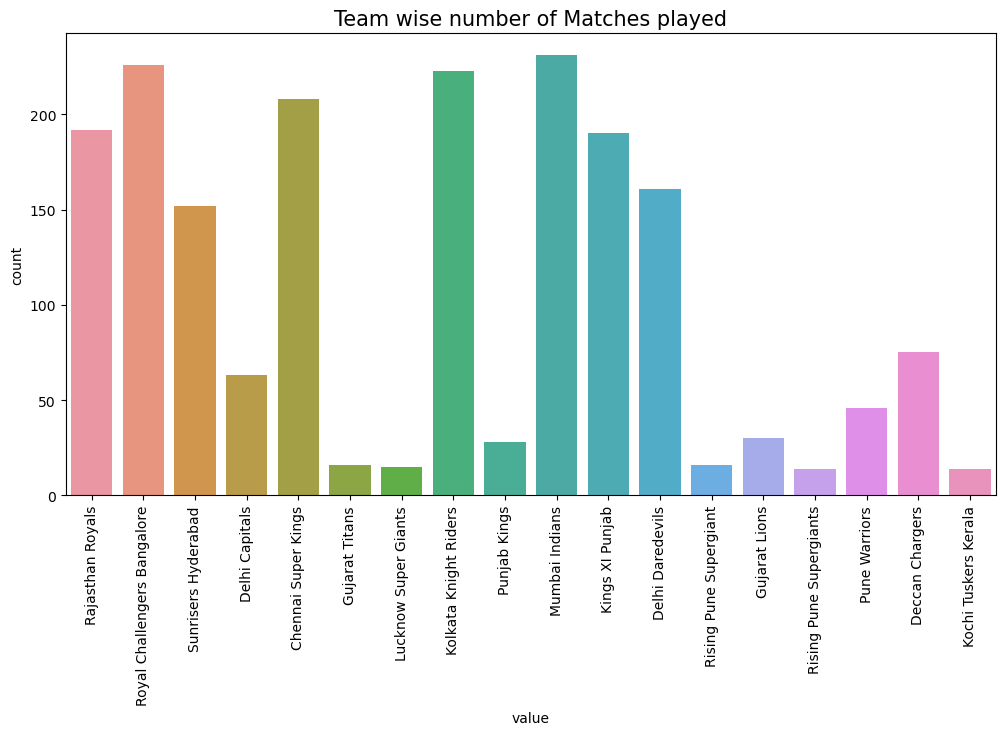

In [142]:
temp_df = pd.melt(match_df, id_vars=['id','season'], value_vars=['team1', 'team2'])

plt.figure(figsize=(12,6))
sns.countplot(x='value', data=temp_df)
plt.title("Team wise number of Matches played", fontsize=15, color='black', fontweight='normal') 
plt.xticks(rotation='vertical')
plt.show()

> **"Mumbai Indians"** lead the pack with most number of matches played followed by **"Royal Challengers Bangalore"**. There are also teams with very few matches like **Gujarat titans**, **Lucknow Super gaints** as they are new teams that came in only last season.

## In Which Venue Most number of Matches are Played?

In [219]:
top_10_played_in_stad = match_df['venue'].value_counts()[:10].reset_index()
top_10_played_in_stad.columns = ['Venue', 'Count']

fig = px.bar(top_10_played_in_stad, x='Venue', y='Count', color='Venue', title='Top 10 Stadium(Venue) that have hosted IPL match', text=top_10_played_in_stad['Count'])
fig.update_xaxes(tickangle=90)
fig.show()

> There are quite a few venues present in the data with **"M Chinnaswamy Stadium Bangalore"** being the one with most number of matches followed by **"Eden Gardens Kolkata"** 

## Which Team won the IPL  Trophy most Times?

In [89]:
ls=[]
for val in match_df.groupby('season'):
    if val[1].head(1).winningteam.values[0]==val[1].head(1).team1.values[0]:
        runner_up=val[1].head(1).team2.values[0]
    else:
        runner_up=val[1].head(1).team1.values[0]
    ls.append([val[0],val[1].head(1).winningteam.values[0],runner_up])

print(ls)

[['2007/08', 'Rajasthan Royals', 'Chennai Super Kings'], ['2009', 'Deccan Chargers', 'Royal Challengers Bangalore'], ['2009/10', 'Chennai Super Kings', 'Mumbai Indians'], ['2011', 'Chennai Super Kings', 'Royal Challengers Bangalore'], ['2012', 'Kolkata Knight Riders', 'Chennai Super Kings'], ['2013', 'Mumbai Indians', 'Chennai Super Kings'], ['2014', 'Kolkata Knight Riders', 'Kings XI Punjab'], ['2015', 'Mumbai Indians', 'Chennai Super Kings'], ['2016', 'Sunrisers Hyderabad', 'Royal Challengers Bangalore'], ['2017', 'Mumbai Indians', 'Rising Pune Supergiant'], ['2018', 'Chennai Super Kings', 'Sunrisers Hyderabad'], ['2019', 'Mumbai Indians', 'Chennai Super Kings'], ['2020/21', 'Mumbai Indians', 'Delhi Capitals'], ['2021', 'Chennai Super Kings', 'Kolkata Knight Riders'], ['2022', 'Gujarat Titans', 'Rajasthan Royals']]


In [90]:
winner_df=pd.DataFrame(ls)
winner_df.rename(columns={0:'Season',1:'Winner',2:'Runner-up'})

,Season,Winner,Runner-up
0,2007/08,Rajasthan Royals,Chennai Super Kings
1,2009,Deccan Chargers,Royal Challengers Bangalore
2,2009/10,Chennai Super Kings,Mumbai Indians
3,2011,Chennai Super Kings,Royal Challengers Bangalore
4,2012,Kolkata Knight Riders,Chennai Super Kings
5,2013,Mumbai Indians,Chennai Super Kings
6,2014,Kolkata Knight Riders,Kings XI Punjab
7,2015,Mumbai Indians,Chennai Super Kings
8,2016,Sunrisers Hyderabad,Royal Challengers Bangalore
9,2017,Mumbai Indians,Rising Pune Supergiant


In [91]:
season_winner_df=winner_df[1].value_counts().to_frame().reset_index().rename(columns={'index':'Winner',1:'Count'})
season_winner_df

,Winner,Count
0,Mumbai Indians,5
1,Chennai Super Kings,4
2,Kolkata Knight Riders,2
3,Rajasthan Royals,1
4,Deccan Chargers,1
5,Sunrisers Hyderabad,1
6,Gujarat Titans,1


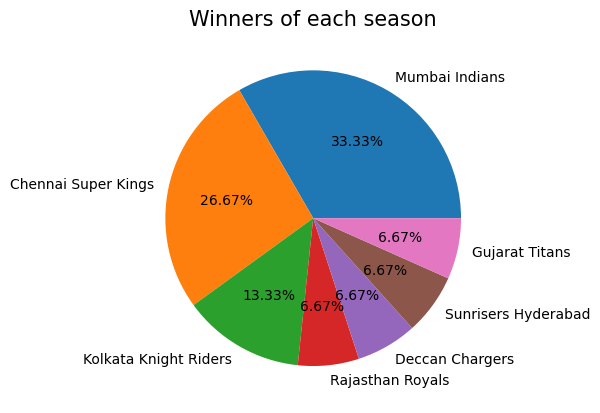

In [140]:
plt.title("Winners of each season", fontsize=15, color='black', fontweight='normal') 
plt.pie(season_winner_df["Count"],labels=season_winner_df["Winner"],autopct='%1.2f%%');

> **Mumbai Indians** seems to be the most strongest team that other as it won max IPL trophies

## Which Team end up being Runner-ups  most Times?

In [93]:
season_runner_ups_df=winner_df[2].value_counts().to_frame().reset_index().rename(columns={'index':'Runner-ups',2:'Count'})
season_runner_ups_df

,Runner-ups,Count
0,Chennai Super Kings,5
1,Royal Challengers Bangalore,3
2,Mumbai Indians,1
3,Kings XI Punjab,1
4,Rising Pune Supergiant,1
5,Sunrisers Hyderabad,1
6,Delhi Capitals,1
7,Kolkata Knight Riders,1
8,Rajasthan Royals,1


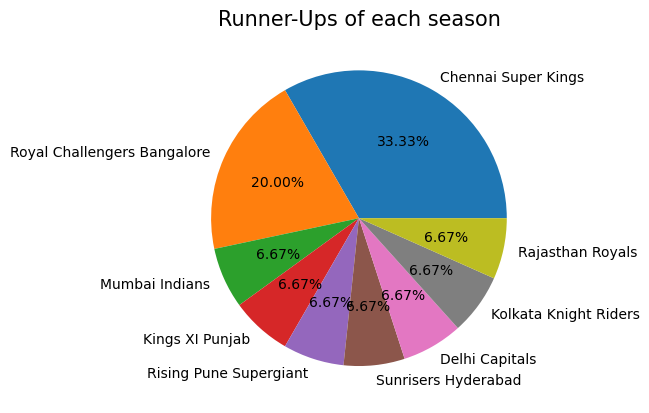

In [145]:
plt.title("Runner-Ups of each season", fontsize=15, color='black', fontweight='normal') 
plt.pie(season_runner_ups_df["Count"],labels=season_runner_ups_df["Runner-ups"],autopct='%1.2f%%');

> **Chennai Super Kings** is the team which is runner up for the maximum time and it is the second highest IPL trophy winning team!

## Who was the Umpair for the most of the Matches?

In [223]:
umpires = pd.DataFrame([(umpire, match_df[(match_df['umpire1']==umpire) | (match_df['umpire2']==umpire)].shape[0]) for umpire in pd.unique(match_df[['umpire1', 'umpire2']].values.ravel())]).sort_values(1, ascending=False)
umpires.columns = ['Umpire', 'Count']
top_10_fav_umpire = umpires[:10]

fig = px.bar(top_10_fav_umpire, x='Umpire', y='Count', color='Umpire', text=top_10_fav_umpire['Count'], title='Top 10 favourite Umpires in IPL')
fig.update_xaxes(tickangle=90)
fig.show()

> **S Ravi** seems to be the most sought after umpire for IPL matches followed by Ravi. Others are fairly close to each other.

## Which Team has Highest Win Percentage

In [229]:
team_palyed_wins = pd.DataFrame((team, match_df[(match_df['team1']==team) | (match_df['team2']==team)].shape[0], match_df[match_df['winningteam']==team].shape[0]) for team in match_df['team1'].unique())
team_palyed_wins.columns = ['Team', 'Played_match', 'Wins_match']
team_palyed_wins = team_palyed_wins.sort_values(by='Played_match', ascending=False)

team_palyed_wins['Win_percent'] = round(team_palyed_wins['Wins_match']*100 / team_palyed_wins['Played_match'], 2)
team_palyed_wins


,Team,Played_match,Wins_match,Win_percent
9,Mumbai Indians,231,131,56.71
1,Royal Challengers Bangalore,226,109,48.23
7,Kolkata Knight Riders,223,114,51.12
4,Chennai Super Kings,208,121,58.17
0,Rajasthan Royals,192,96,50.00
10,Kings XI Punjab,190,88,46.32
11,Delhi Daredevils,161,67,41.61
2,Sunrisers Hyderabad,152,75,49.34
16,Deccan Chargers,75,29,38.67
3,Delhi Capitals,63,36,57.14


In [231]:
fig = px.bar(team_palyed_wins, x="Team", y="Win_percent", text=team_palyed_wins['Win_percent'], color='Team', title="Win Percentage | Played vs Win ")
fig.update_xaxes(tickangle=90)
fig.show()

In [233]:
teams = team_palyed_wins['Team'].tolist()
played = team_palyed_wins['Played_match'].tolist()
wins = team_palyed_wins['Wins_match'].tolist()

fig = go.Figure(data=[
    go.Bar(name='Played Match', x=teams, y=played, text=played, textposition='auto'),
    go.Bar(name='Win Match', x=teams, y=wins, text=wins, textposition='auto')
])

fig.update_layout(barmode='stack', title_text='Played Vs Wins ')
fig.update_xaxes(tickangle=90)
fig.show()

> **Mumbai Indians** has the Highest win Percentage in IPL

## Toss Decisions

In [238]:
toss_dicision = match_df['tossdecision'].value_counts().reset_index()
toss_dicision.columns = ['Toss_dicision', 'Count']

fig = px.pie(toss_dicision, values='Count', names='Toss_dicision', title='Toss Dicision Percentage')

fig.show()

> Almost 63% of the toss decisions are made to field first. Now let us see how this decision varied over time.

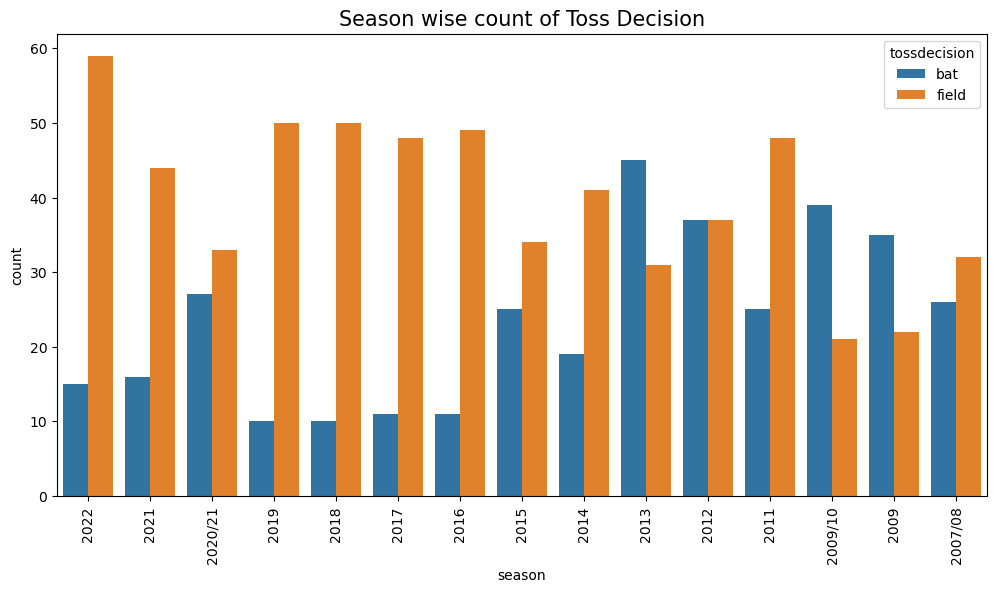

In [149]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='tossdecision', data=match_df)
plt.xticks(rotation='vertical')
plt.title("Season wise count of Toss Decision", fontsize=15, color='black', fontweight='normal')
plt.show()

> It seems during the initial years, teams wanted to bat first. Look at the **2018 & 2019 season**, most of the toss decisions are to field first.

## Toss win and Match win Success Ratio

In [151]:
Total_matches_played = delivery_df['battingteam'].value_counts() + delivery_df['bowlingteam'].value_counts()

toss_won = match_df['tosswinner'].value_counts()
toss_win_success_rate = (toss_won/Total_matches_played)*100
toss_win_success_rate_sort = toss_win_success_rate.sort_values(ascending = False)
toss_win_success_rate_sort

data = [go.Bar(
    x = toss_win_success_rate.sort_values(ascending=False).index,
    y = toss_win_success_rate.sort_values(ascending=False).values,
    marker = dict(color = random_colors(len(toss_win_success_rate.sort_values(ascending=False).index)),line=dict(color='#000000', width=1.5))
)]

layout = go.Layout(title="Toss Win success ratio.",
                   xaxis=dict(title="Teams"),
                   yaxis=dict(title="Number of Matches"))
# Create figure with all prepared data for plot
fig = go.Figure(data=data, layout=layout)
# Create a plot in your Python script directory with name "bar-chart.html"
iplot(fig)

> From the above visualization it is being observed that Gujarat Titans has the best Toss to Match win ratio

## What is The High scores successfully chased & Low scores successfully defended?

In [99]:
full_data = pd.merge(match_df, delivery_df, how='left', on='id')

inning_data = full_data[['id', 'inning', 'total_runs']]\
                        [(full_data['superover']=='N') & (full_data['method'] !='D/L')]\
                        .groupby(['id', 'inning']).agg(inning_score=('total_runs','sum')).reset_index()
inning_data = inning_data.pivot_table('inning_score', ['id'], 'inning').reset_index()
inning_data.rename(columns = {1:'first_inning', 2:'second_inning'}, inplace=True)

match_scores = pd.merge(match_df, inning_data, how='left', on='id')

chased_matches=match_scores[match_scores['wonby']=='Wickets'].sort_values('first_inning', ascending=False)
defended_matches=match_scores[match_scores['wonby']=='Runs'].sort_values('first_inning', ascending=True)

for idx, row in chased_matches.head().iterrows():
    print(Fore.RED+ Style.BRIGHT+  row['team2'] + Style.RESET_ALL \
      + ' sucessfully chased target of ' \
      + Back.CYAN+ Style.BRIGHT+ Style.BRIGHT + str(row['first_inning']) + Style.RESET_ALL \
      + ' against '\
      + Fore.RED + Style.BRIGHT+ row['team1'] + Style.RESET_ALL
      + 'in season ' 
      + Fore.BLUE + Style.BRIGHT+ row['season'] + Style.RESET_ALL )

Rajasthan Royals sucessfully chased target of 223.0 against Kings XI Punjabin season 2020/21
Mumbai Indians sucessfully chased target of 218.0 against Chennai Super Kingsin season 2021
Rajasthan Royals sucessfully chased target of 214.0 against Deccan Chargersin season 2007/08
Lucknow Super Giants sucessfully chased target of 210.0 against Chennai Super Kingsin season 2022
Gujarat Lions sucessfully chased target of 208.0 against Delhi Daredevilsin season 2017


In [100]:

for idx, row in defended_matches.head().iterrows():
    print(Fore.RED+ Style.BRIGHT+  row['team1'] + Style.RESET_ALL \
      + ' sucessfully defended target of ' \
      + Back.CYAN + Style.BRIGHT+ str(row['first_inning']) + Style.RESET_ALL \
      + ' against '\
      + Fore.RED + Style.BRIGHT+ row['team2'] + Style.RESET_ALL
      + 'in season ' 
      + Fore.BLUE + Style.BRIGHT+ row['season'] + Style.RESET_ALL )

Royal Challengers Bangalore sucessfully defended target of 106.0 against Chennai Super Kingsin season 2013
Kings XI Punjab sucessfully defended target of 106.0 against Royal Challengers Bangalorein season 2015
Chennai Super Kings sucessfully defended target of 116.0 against Kings XI Punjabin season 2009
Sunrisers Hyderabad sucessfully defended target of 118.0 against Mumbai Indiansin season 2018
Kings XI Punjab sucessfully defended target of 119.0 against Mumbai Indiansin season 2009


## Win Margin Analysis

In [101]:

for idx, row in match_df[['winningteam','win_against', 'margin', 'season']]\
    [match_df['margin'] == match_df['margin'].max()].iterrows():
    print(Fore.RED+ Style.BRIGHT+  row['winningteam'] + Style.RESET_ALL \
      + ' won with highest ever margin of ' \
      + Back.CYAN + Style.BRIGHT+ str(row['margin']) + Style.RESET_ALL \
      + ' against '\
      + Fore.RED + Style.BRIGHT+ row['win_against'] + Style.RESET_ALL
      + 'in season ' 
      + Fore.BLUE + Style.BRIGHT+ row['season'] + Style.RESET_ALL )

Mumbai Indians won with highest ever margin of 146.0 against Delhi Daredevilsin season 2017


In [102]:

margin_df= match_df.groupby('season').agg(max_margin=('margin', 'max')).reset_index()
for idx1, row1 in margin_df[[ 'season', 'max_margin']].iterrows():
    for idx, row in match_df[['winningteam','win_against', 'margin', 'season']]\
            [(match_df['margin'] == row1['max_margin']) & (match_df['season'] == row1['season'])]\
            .iterrows():
        print(Fore.RED+ Style.BRIGHT+  row['winningteam'] + Style.RESET_ALL \
          + ' won with highest margin of ' \
          + Back.CYAN + Style.BRIGHT+ str(row['margin']) + Style.RESET_ALL \
          + ' against '\
          + Fore.RED + Style.BRIGHT+ row['win_against'] + Style.RESET_ALL
          + 'in season ' 
          + Fore.BLUE + Style.BRIGHT +row['season'] + Style.RESET_ALL )

Kolkata Knight Riders won with highest margin of 140.0 against Royal Challengers Bangalorein season 2007/08
Mumbai Indians won with highest margin of 92.0 against Kolkata Knight Ridersin season 2009
Chennai Super Kings won with highest margin of 92.0 against Royal Challengers Bangalorein season 2009
Mumbai Indians won with highest margin of 98.0 against Delhi Daredevilsin season 2009/10
Kings XI Punjab won with highest margin of 111.0 against Royal Challengers Bangalorein season 2011
Chennai Super Kings won with highest margin of 86.0 against Delhi Daredevilsin season 2012
Royal Challengers Bangalore won with highest margin of 130.0 against Pune Warriorsin season 2013
Chennai Super Kings won with highest margin of 93.0 against Delhi Daredevilsin season 2014
Royal Challengers Bangalore won with highest margin of 138.0 against Kings XI Punjabin season 2015
Royal Challengers Bangalore won with highest margin of 144.0 against Gujarat Lionsin season 2016
Mumbai Indians won with highest marg

## Head on head encounters : Team vs Team (win count on each other)

In [103]:
df1=match_df[['winningteam','win_against']].groupby(['winningteam','win_against']).agg(win_count=('win_against','count'))
df2=df1.pivot_table('win_count', ['winningteam'], 'win_against')
df2

win_against,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Gujarat Titans,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Lucknow Super Giants,Mumbai Indians,Pune Warriors,Punjab Kings,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
winningteam,,,,,,,,,,,,,,,,,,
Chennai Super Kings,NaN,6.0,5.0,12.0,NaN,NaN,14.0,1.0,17.0,NaN,14.0,4.0,1.0,15.0,NaN,NaN,19.0,13.0
Deccan Chargers,4.0,NaN,NaN,4.0,NaN,NaN,3.0,1.0,2.0,NaN,4.0,3.0,NaN,2.0,NaN,NaN,6.0,NaN
Delhi Capitals,4.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,6.0,NaN,4.0,NaN,4.0,6.0,NaN,NaN,4.0,6.0
Delhi Daredevils,6.0,7.0,NaN,NaN,3.0,NaN,9.0,1.0,8.0,NaN,11.0,3.0,NaN,7.0,2.0,NaN,6.0,4.0
Gujarat Lions,NaN,NaN,NaN,1.0,NaN,NaN,2.0,NaN,3.0,NaN,2.0,NaN,NaN,NaN,1.0,2.0,2.0,NaN
Gujarat Titans,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,3.0,NaN,NaN,1.0,1.0
Kings XI Punjab,9.0,7.0,2.0,13.0,2.0,NaN,NaN,1.0,9.0,NaN,12.0,3.0,NaN,9.0,1.0,1.0,14.0,5.0
Kochi Tuskers Kerala,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Kolkata Knight Riders,9.0,7.0,3.0,13.0,1.0,NaN,18.0,NaN,NaN,NaN,9.0,4.0,2.0,14.0,1.0,2.0,16.0,15.0


# Batsman analysis:

Let us start our analysis with batsman. 

## Top 10 Batsmans

In [104]:
#Let us list the top 10 batsmen based on the total runs they made in IPL
top_batsman=delivery_df.groupby(['batter']).agg(batsman_total=('batsman_run', 'sum')).reset_index()\
                .sort_values(by='batsman_total', ascending=False).head(10)

fig = px.pie(values=top_batsman.batsman_total, 
             names=top_batsman.batter,
             color_discrete_sequence=px.colors.sequential.Oranges)
fig.update_traces(textposition='inside',
                  textfont_size=11,
                  textinfo='value+label')

fig.update_layout(title_text="<b>Top 10 Batsmen</b>",
                  title_font_family="Times New Roman",
                  title_font_color="red",
                  title_font_size=20,
                  uniformtext_minsize=12, 
                  uniformtext_mode='hide')

fig.show()

> V Kohli is the Top Run Scorrer in the IPL till now

In [105]:

top_batsman_score = pd.DataFrame(columns=['batsman', 'fours', 'sixers', 'fifties', 'hundreds','heighest_score','total_runs', 'matches_played'])
for idx, row in top_batsman.iterrows():
    batsman_data = delivery_df[delivery_df['batter'] == row['batter']][['id', 'batter', 'batsman_run']]

    r4 = len(batsman_data[batsman_data['batsman_run'] == 4])
    r6 = len(batsman_data[batsman_data['batsman_run'] == 6])

    innings_score = batsman_data.groupby('id').agg(score=('batsman_run', 'sum')).reset_index()
    r50=len(innings_score[(innings_score['score'] >=50) & (innings_score['score'] < 100)])
    r100 = len(innings_score[innings_score['score'] >= 100])
    matches_played =  len(innings_score)
    heighest_score = innings_score['score'].max()


    top_batsman_score = top_batsman_score.append({'batsman': row['batter'], 'fours': r4, 'sixers': r6, 'fifties':r50,
                                                  'hundreds':r100, 'total_runs':row['batsman_total'],
                                                  'heighest_score':heighest_score,
                                                  'matches_played':matches_played},ignore_index=True)

top_batsman_score


,batsman,fours,sixers,fifties,hundreds,heighest_score,total_runs,matches_played
0,V Kohli,581,219,45,5,113,6634,215
1,S Dhawan,701,137,47,2,106,6244,205
2,DA Warner,577,216,55,4,126,5883,162
3,RG Sharma,519,241,40,1,109,5881,221
4,SK Raina,506,204,39,1,100,5536,200
5,AB de Villiers,414,253,41,3,133,5181,170
6,CH Gayle,408,359,32,6,175,4997,141
7,MS Dhoni,346,229,24,0,84,4978,205
8,RV Uthappa,481,182,27,0,88,4954,197
9,KD Karthik,426,134,20,0,97,4377,207


In [106]:
# top_batsman_score

fig = make_subplots(cols=2,rows=3,
    vertical_spacing = 0.25, horizontal_spacing=.1,
                    subplot_titles=["No. of Sixers","No. of Fours",
                                    "No. of Half-Centuries","No. of Centuries",
                                   "Highest Scores", "Total Runs"],
                    y_title="<b>Top 10 Batsmen Performance</b>"
    )
fig.add_trace(go.Bar(x=top_batsman_score.batsman,y=top_batsman_score.sixers,name="Highest Sixers"),row=1,col=1)
fig.add_trace(go.Bar(x=top_batsman_score.batsman,y=top_batsman_score.fours,name="Highest Fours"),row=1,col=2)
fig.add_trace(go.Bar(x=top_batsman_score.batsman,y=top_batsman_score.fifties,name="Highest Fifties"),row=2,col=1)
fig.add_trace(go.Bar(x=top_batsman_score.batsman,y=top_batsman_score.hundreds,name="Highest Hundreds"),row=2,col=2)
fig.add_trace(go.Bar(x=top_batsman_score.batsman,y=top_batsman_score.heighest_score,name="Highest Score"),row=3,col=1)
fig.add_trace(go.Bar(x=top_batsman_score.batsman,y=top_batsman_score.total_runs,name="Total Runs"),row=3,col=2)
fig.update_layout(height=800,width=1000, title_text="<b>Top 10 Batsmen Performance</b>",
                  title_font_family="Times New Roman",title_font_color="red",
                  title_font_size=20,)
fig.show()

> Above details will show the performance of the top 10 IPL Players in the entire season of IPL till now

## Runs scored by top batsmen against opponent teams

In [107]:
df1 = delivery_df[['batter','bowlingteam', 'batsman_run']][delivery_df['batter'].isin(top_batsman['batter'])]\
            .groupby(['batter', 'bowlingteam']).agg(batter_score=('batsman_run', 'sum')).reset_index()


df2 = df1.pivot_table('batter_score', ['bowlingteam'], 'batter')
df2

batter,AB de Villiers,CH Gayle,DA Warner,KD Karthik,MS Dhoni,RG Sharma,RV Uthappa,S Dhawan,SK Raina,V Kohli
bowlingteam,,,,,,,,,,
Chennai Super Kings,532.0,395.0,558.0,647.0,NaN,770.0,547.0,1029.0,NaN,979.0
Deccan Chargers,153.0,67.0,226.0,164.0,281.0,175.0,138.0,118.0,310.0,306.0
Delhi Capitals,179.0,122.0,182.0,154.0,160.0,211.0,155.0,28.0,154.0,164.0
Delhi Daredevils,409.0,383.0,268.0,378.0,487.0,701.0,587.0,522.0,507.0,761.0
Gujarat Lions,233.0,100.0,336.0,NaN,83.0,82.0,111.0,127.0,NaN,283.0
Gujarat Titans,NaN,NaN,NaN,4.0,7.0,43.0,3.0,97.0,NaN,131.0
Kings XI Punjab,710.0,797.0,906.0,557.0,595.0,671.0,756.0,733.0,822.0,681.0
Kochi Tuskers Kerala,54.0,44.0,16.0,69.0,23.0,NaN,31.0,4.0,69.0,50.0
Kolkata Knight Riders,522.0,700.0,1018.0,366.0,551.0,1020.0,283.0,810.0,829.0,786.0


## Performance of Selected Playes across the Seasons.

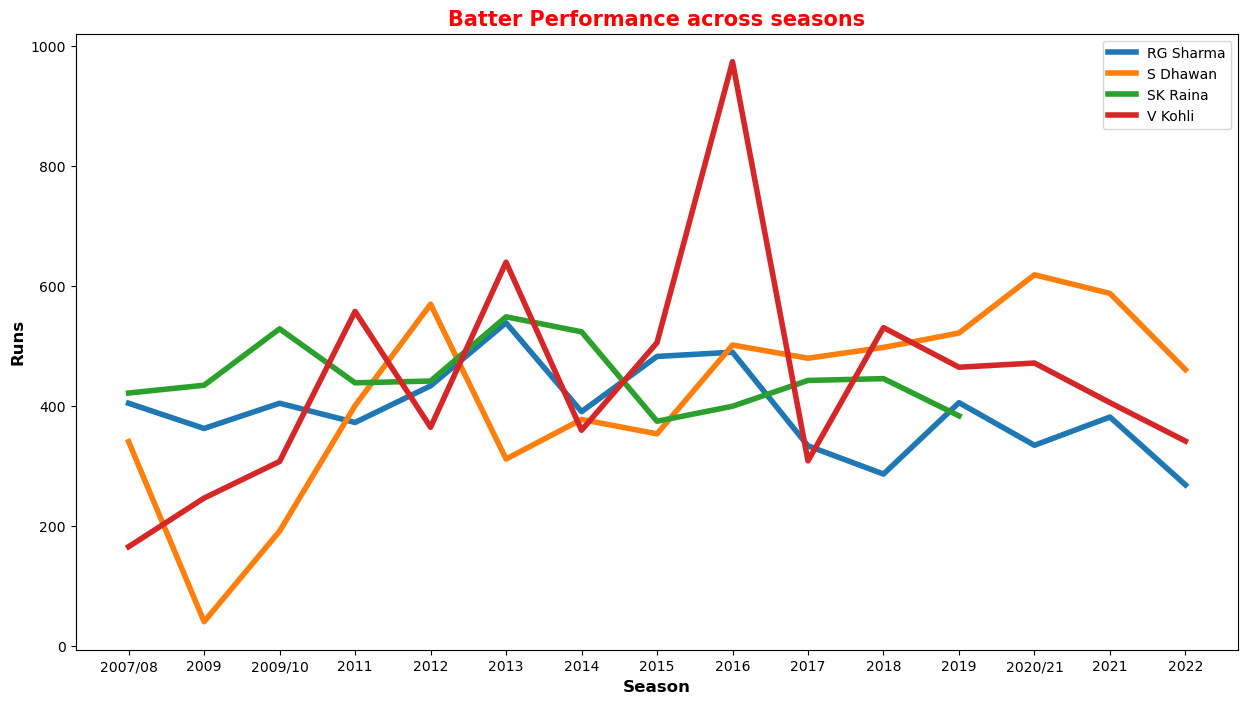

In [126]:
top_batsman =['RG Sharma', 'S Dhawan', 'SK Raina', 'V Kohli'] 
top_batsman_runs=delivery_df[delivery_df['batter'].isin(top_batsman)].groupby(['season','batter'])\
    .agg(batsman_total=('batsman_run', 'sum')).reset_index()\
    .sort_values(by=['season','batsman_total'], ascending=False)
top_batsman_runs=top_batsman_runs.pivot_table('batsman_total', ['season'], 'batter').reset_index()

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
plt.plot(top_batsman_runs['season'], top_batsman_runs['RG Sharma'], label = 'RG Sharma', linewidth=4)
plt.plot(top_batsman_runs['season'], top_batsman_runs['S Dhawan'], label = 'S Dhawan', linewidth=4)
plt.plot(top_batsman_runs['season'], top_batsman_runs['SK Raina'], label = 'SK Raina', linewidth=4)
plt.plot(top_batsman_runs['season'], top_batsman_runs['V Kohli'], label = 'V Kohli', linewidth=4)
plt.xlabel("Season", fontsize=12, fontweight='bold') 
plt.ylabel("Runs", fontsize=12, fontweight='bold')
plt.title("Batter Performance across seasons", fontsize=15, color='red', fontweight='bold') 
plt.legend()
plt.show()

## Who is The Top Run Scorrer ?


In [198]:
batting_tot=delivery_df.groupby('batter').apply(lambda x:np.sum(x['batsman_run'])).reset_index(name='Runs')
batting_sorted=batting_tot.sort_values(by='Runs',ascending=False)
top_batsmen=batting_sorted[:10] 
fig = px.bar(top_batsmen, x='batter', y='Runs',
             hover_data=['batter'], color='Runs',title='Top 10 Batsmen with most Runs')
fig.show()

> **Virat Kohli** is leading the chart followed closely by Shikhar Dhawan. DA Warner is the top scorer among foreign players.

## Which Batsman hit the most number of Boundries?


In [194]:
batting_tot=delivery_df.groupby('batter')['batsman_run'].agg(lambda x: (x==4).sum()).reset_index(name='Boundries').sort_values(by='Boundries', ascending=False).reset_index(drop=True)
batting_sorted=batting_tot.sort_values(by='Boundries',ascending=False)
top_batsmen=batting_sorted[:10] 
fig = px.bar(top_batsmen, x='batter', y='Boundries',
             hover_data=['batter'], color='Boundries',title='Top 10 Batsmen with Most number of Boundries')
fig.show()

> **Shikhar Dhawan** is way ahead of others - almost 130 boundaries more than **Virat Kohli**.

## Which Batsman hit the most number of Sixes?


In [197]:
batting_tot=delivery_df.groupby('batter')['batsman_run'].agg(lambda x: (x==6).sum()).reset_index(name='Sixes').sort_values(by='Sixes', ascending=False).reset_index(drop=True)
batting_sorted=batting_tot.sort_values(by='Sixes',ascending=False)
top_batsmen=batting_sorted[:10] 
fig = px.bar(top_batsmen, x='batter', y='Sixes',
             hover_data=['batter'], color='Sixes',title='Top 10 Batsmen with Most number of Sixes')
fig.show()

>There you see the big man. **Gayle**, the unassailable leader in the number of sixes.


## which is the Best batting performance in IPL

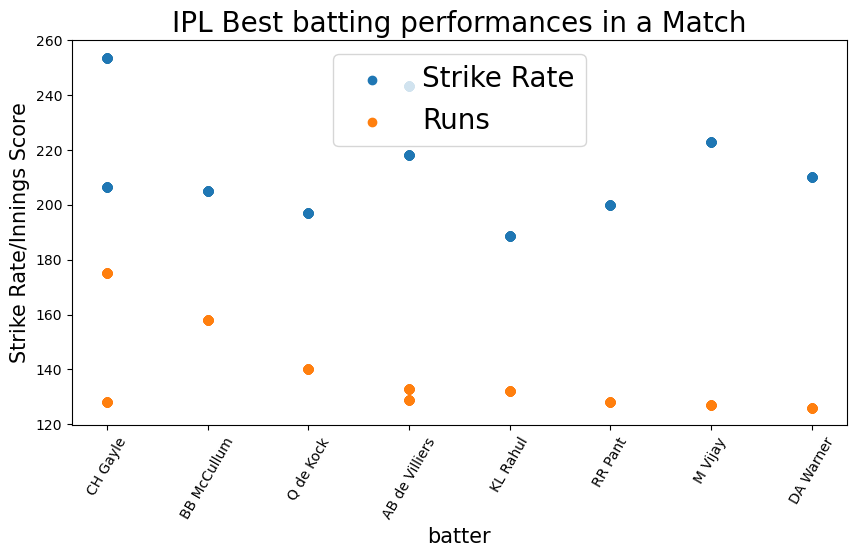

In [210]:
batting_ings=delivery_df.groupby(['id','batter']).apply(lambda x:np.sum(x['batsman_run'])).reset_index(name='Innings Runs')
batting_ings_sorted=batting_ings.sort_values(by='Innings Runs',ascending=False)
top_batsmen_scores=batting_ings_sorted[:10] 
batsman_ball_faced=delivery_df.groupby(['id','batter']).apply(lambda x:x['batsman_run'].count()).reset_index(name='Balls Faced')
batsmen_performance=pd.merge(top_batsmen_scores,batsman_ball_faced,how='inner',left_on=['id','batter'],right_on=['id','batter'])
batsmen_performance['Strike Rate for Match']=batsmen_performance['Innings Runs']*100/batsmen_performance['Balls Faced']
batsmen_innings=pd.merge(batsmen_performance,delivery_df,how='inner',left_on=['id','batter'],right_on=['id','batter'])
batsmen_innings_req=batsmen_innings.iloc[:,1:8]
batsmen_innings_req_2=batsmen_innings_req.drop_duplicates()
x=batsmen_innings_req_2['batter']
y1=batsmen_innings_req_2['Strike Rate for Match']
y2=batsmen_innings_req_2['Innings Runs']
plt.figure(figsize=(10,5))
plt.scatter(x,y1)
plt.scatter(x,y2)
plt.xlabel('batter',size=15)
plt.ylabel('Strike Rate/Innings Score',size=15)
plt.title('IPL Best batting performances in a Match',size=20)
plt.xticks(rotation=60)
plt.legend(['Strike Rate','Runs'],prop={'size':20})

>**Gayle** has the Best Batting Performance in IPL.


## Which Batsman Played most number of Dot Balls?

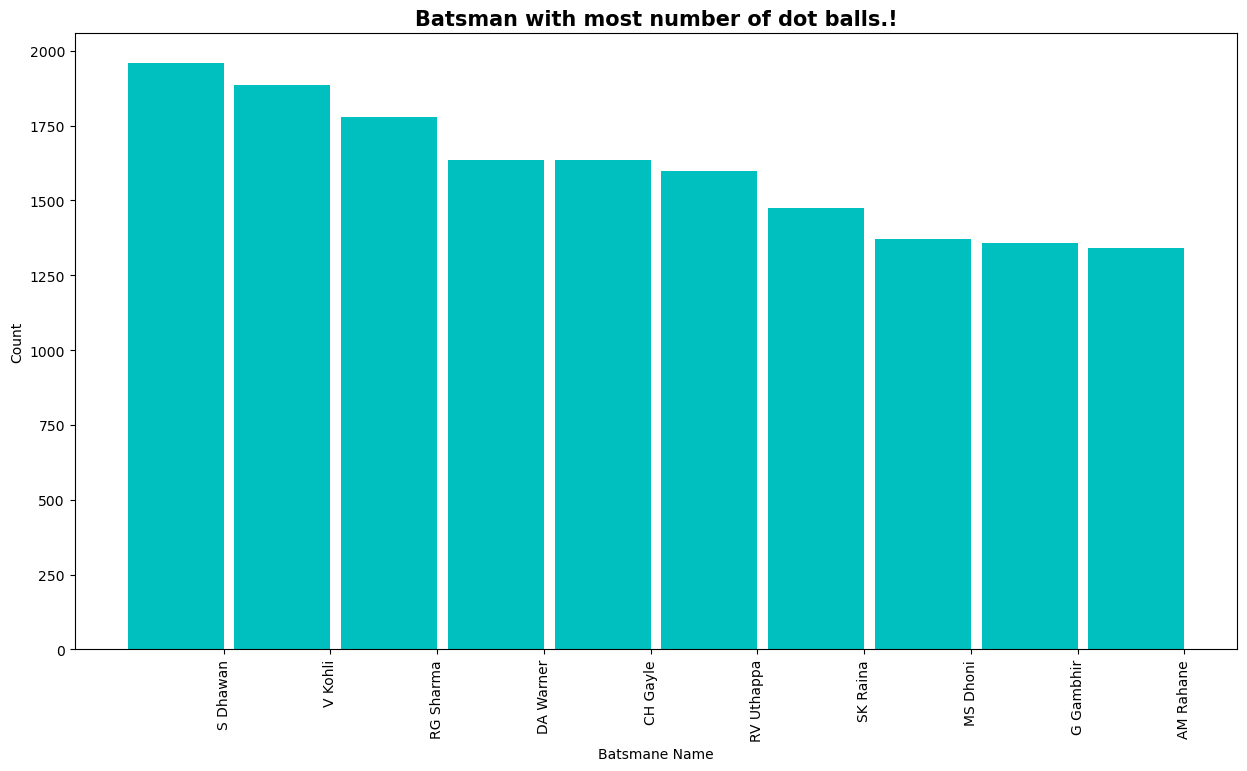

In [159]:
# Now let us see the batsman who has played the most number of dot balls.
temp_df = delivery_df.groupby('batter')['batsman_run'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='batsman_run', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batter'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_run']), width=width, color='c')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of dot balls.!",fontsize = 15, color='black', fontweight='bold')
ax.set_xlabel('Batsmane Name')
plt.show()

>It is interesting to see that the same names repeat again here as well. I think since these guys have played more number of balls, they have more dot balls as well.

## Who won Player of The Match most times?

In [214]:
top_10_player_of_the_match = match_df['player_of_match'].value_counts()[:10].reset_index()
top_10_player_of_the_match.columns = ['Player', 'Count']

fig = px.bar(top_10_player_of_the_match, x="Player", y="Count", text=top_10_player_of_the_match['Count'], color='Player', title="Top 10 Player of the match")
fig.update_xaxes(tickangle=90)
fig.show()

> **AB de Villiers** is the most Successful player in all match winners.

# Bowler Analysis

## Top 10 Wicket takers

In [199]:
bowling_wickets=delivery_df[delivery_df['dismissal_kind']!='run out']
bowling_tot=bowling_wickets.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wick_count=bowling_tot.groupby('bowler').count().reset_index()
bowling_top=bowling_wick_count.sort_values(by='Wickets',ascending=False)
top_bowlers=bowling_top.loc[:,['bowler','Wickets']][0:10] 
fig = px.bar(top_bowlers, x='bowler', y='Wickets',
             hover_data=['bowler'], color='Wickets',title='Top 10 Bowlers in IPL- Seasons 2008-2022')
fig.show()

>**DJ Bravo** is the the bowler who took most number of wickets.

## Bowler who Bowled most number of Balls

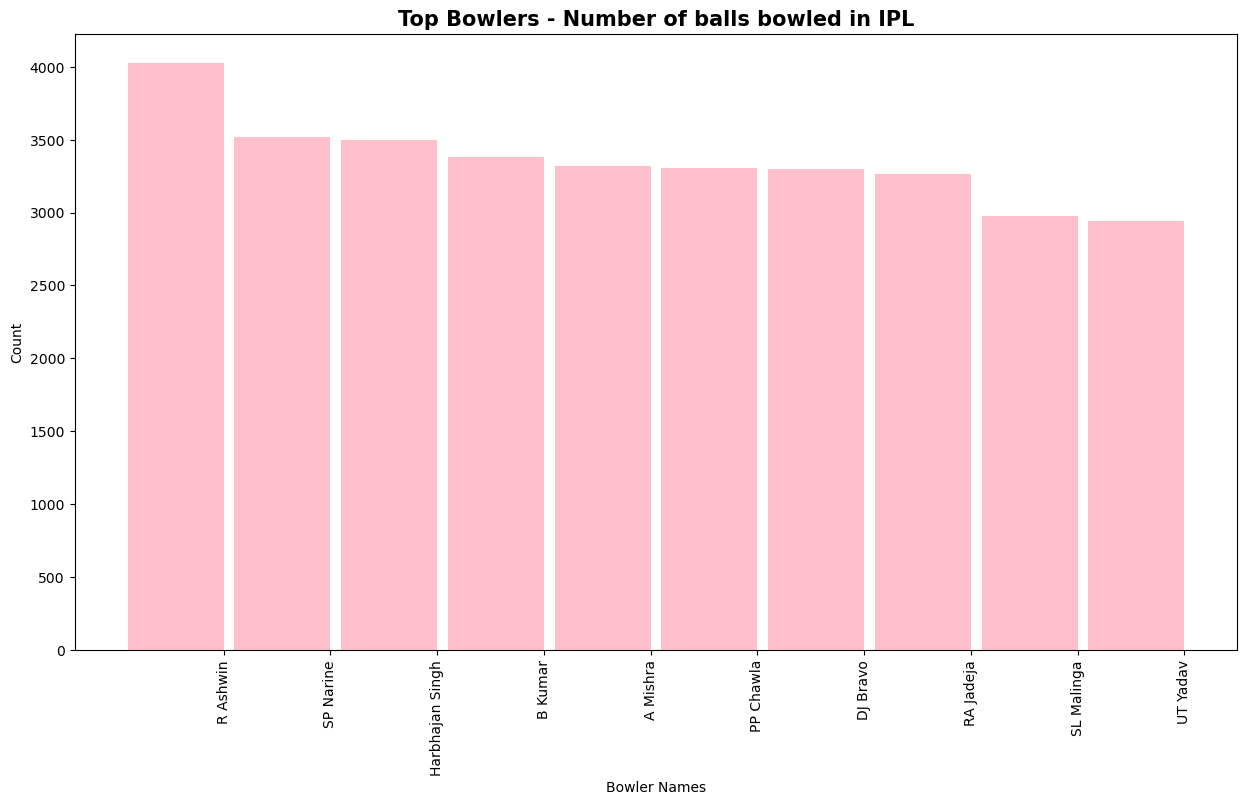

In [157]:
temp_df = delivery_df.groupby('bowler')['ballnumber'].agg('count').reset_index().sort_values(by='ballnumber', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['ballnumber']), width=width, color='pink')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of balls bowled in IPL",fontsize = 15, color='black', fontweight='bold')
ax.set_xlabel('Bowler Names')
plt.show()

>**R Ashwin** is the the bowler with most number of balls bowled in IPL matches. Now let us see the bowler with more number of dot balls.

## Which Bowler Bowled most number of Dot Balls?

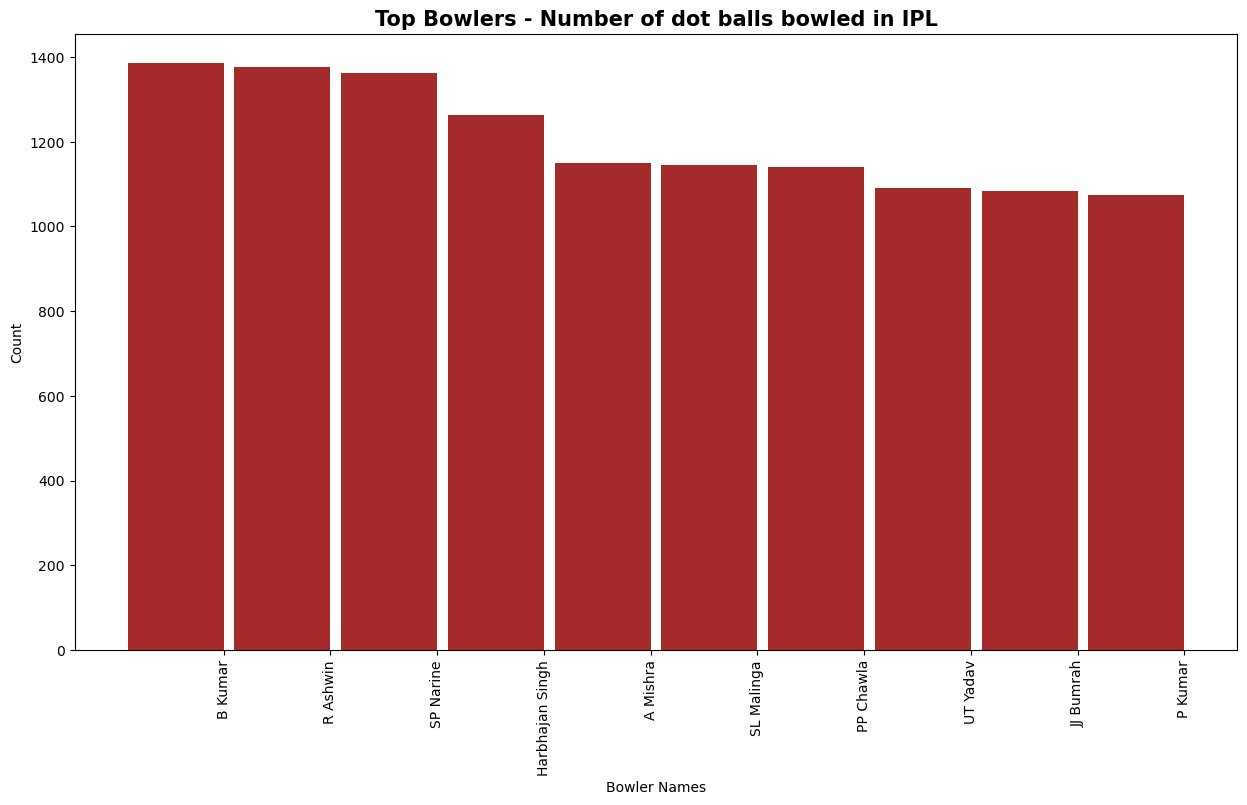

In [128]:
temp_df = delivery_df.groupby('bowler')['total_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['total_runs']), width=width, color='brown')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of dot balls bowled in IPL")
plt.title("Top Bowlers - Number of dot balls bowled in IPL", fontsize=15, color='black', fontweight='bold') 
ax.set_xlabel('Bowler Names')
plt.show()

>**B Kumar** is the one with more number of dot balls followed by **R Ashwin & SP Narine**

## Which Bowler Bowled most Number of Extras?

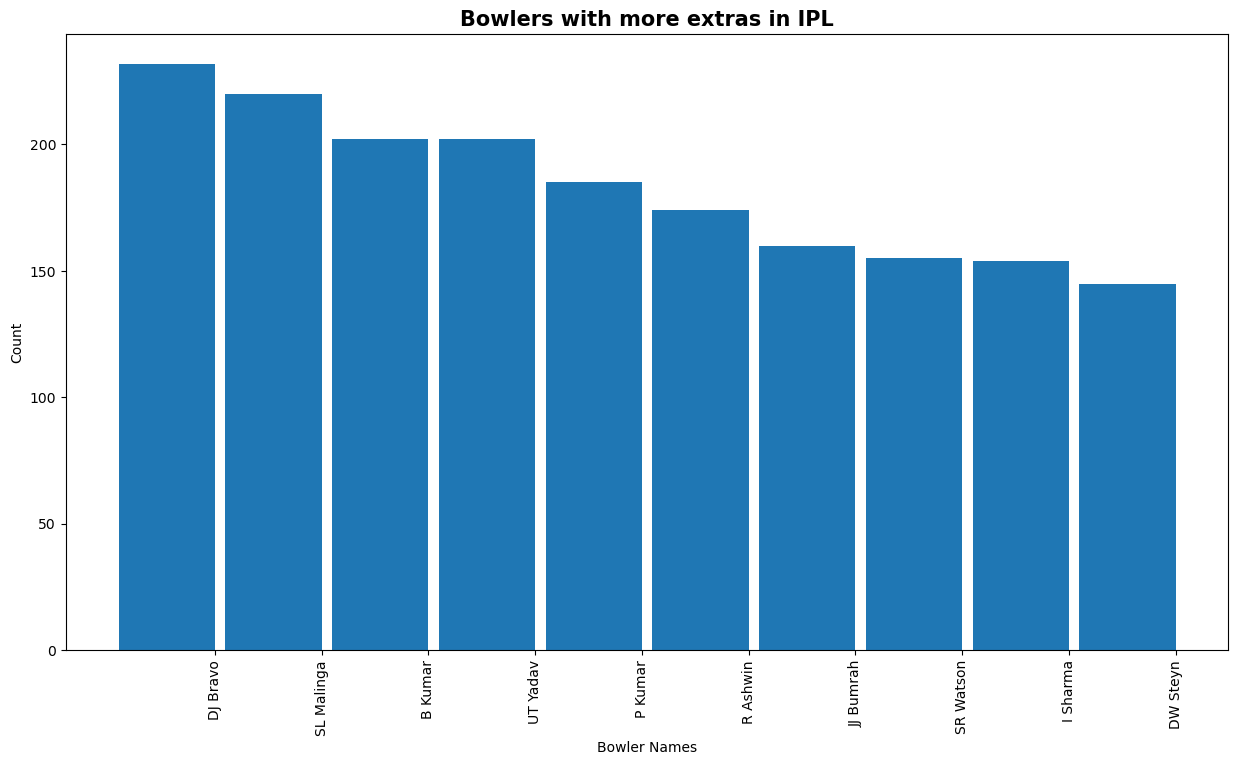

In [200]:
# Now let us see the bowlers who has bowled more number of extras in IPL.
temp_df = delivery_df.groupby('bowler')['extras_run'].agg(lambda x: (x>0).sum()).reset_index().sort_values(by='extras_run', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['extras_run']), width=width)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Bowlers with more extras in IPL", fontsize=15, color='black', fontweight='bold')
ax.set_xlabel('Bowler Names')
plt.show()

>**Dj Bravo** tops the chart with 220+ extra runs followed by **SL Malinga.**

## Which is the Most Common Dismissal type in IPL?

In [117]:
delivery_df.dismissal_kind.value_counts()

caught                   6837
bowled                   1944
run out                  1007
lbw                       685
stumped                   325
caught and bowled         323
hit wicket                 14
retired hurt               13
obstructing the field       2
retired out                 1
Name: dismissal_kind, dtype: int64

In [118]:
top_batsman=delivery_df.groupby(['dismissal_kind']).agg(batsman_total=('dismissal_kind', 'count')).reset_index()\
                .sort_values(by='batsman_total', ascending=False).head(10)

fig = px.pie(values=top_batsman.batsman_total, 
             names=top_batsman.dismissal_kind)
fig.update_traces(textposition='inside',
                  textfont_size=11,
                  textinfo='value+label')

fig.update_layout(title_text="<b>Most Common Dismissal type in IPL",
                  title_font_family="Times New Roman",
                  title_font_color="red",
                  title_font_size=20,
                  uniformtext_minsize=12, 
                  uniformtext_mode='hide')

fig.show()

>**Caught** is the Most common type of Dismissal in IPL.

# Conclusion

* In **2013**, we have the most number of matches.
* **Mumbai Indians** are the winners in most of the matches.
* **"Mumbai Indians"** lead the pack with most number of matches played followed by **"Royal Challengers Bangalore"**. There are also teams with very few matches like **Gujarat titans**, **Lucknow Super gaints** as they are new teams that came in only last season.
* There are quite a few venues present in the data with **"M Chinnaswamy Stadium Bangalore"** being the one with most number of matches followed by **"Eden Gardens Kolkata"**.
* **S Ravi** seems to be the most sought after umpire for IPL matches followed by Ravi. Others are fairly close to each other.
* Almost 63% of the toss decisions are made to field first. Now let us see how this decision varied over time.
* It seems during the initial years, teams wanted to bat first. Look at the **2018 & 2019 season**, most of the toss decisions are to field first.
*  **Virat Kohli** is leading the chart followed closely by Shikhar Dhawan. DA Warner is the top scorer among foreign players.
* **Shikhar Dhawan** is way ahead of others - almost 130 boundaries more than **Virat Kohli**.
* There you see the big man. **Gayle**, the unassailable leader in the number of sixes.
* It is interesting to see that the same names repeat again here as well. I think since these guys have played more number of balls, they have more dot balls as well.
* **Caught** is the Most common type of Dismissal in IPL.
* **B Kumar** is the one with more number of dot balls followed by **R Ashwin & SP Narine**.
* **AB de Villiers** is the most Successful player in all match winners.

# Summary


- EDA (Exploratory Data Analysis) was done using Python libraries such as opendatasets, pandas, numpy, seaborn, plotly for extracting, cleaninf and visualizing the data.
- The above analysis gives us an overview of the IPL matches, stats of different players and some more enjoyable and knowledge facts about IPL from the Starting of IPL in the year 2008 upto 2022. The above observation contains a lot of informations about a player in particular or a team as a whole. 

- With that, we’ve come to the end of this analysis. If you are a cricket lover I am sure you have heard about IPL before, and for many of you it is one of the favourite games to enjoy with your family. It's fun as well exciting to discuss the results of the games you love and tell others the stories of the same ,after going through this notebook you will have a lot more stories to tell about IPL and brag about your knowledge on the game. Hope you enjoyed!! 

# References
(1) Python offical documentation. https://docs.python.org/3/

(2) Kaggle. https://www.kaggle.com/datasets/vora1011/ipl-2022-match-dataset?select=IPL_Ball_by_Ball_2022.csv

(3) Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html

(4) Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html

(5) Data analysis guide(https://jovian.ml/aakashns/python-pandas-data-analysis)

(6) Jovian Forum (Ask Questions in this great community): https://jovian.ml/forum/

(7) Stackoverflow Community (Get answers of any problems): https://stackoverflow.com/questions

# Future work
- Creating the EDA for the upcoming IPL seasons.
- We can also get in deep analyse more about the batsman performance based on day and etc.
- With all the insights , and further analysis into the data, we can have answers to a lot of questions like -Who won most number of IPL seasons and who haven't yet won the IPL seasons etc.

# Thank You

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>